In [1]:
#import Biopython
import Bio as Bio

In [11]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [12]:
# Open the alignment file as a MultipleSeqAlignment object 
with open("muscle_aligment.clw","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [13]:
# Open and initiate the Distance Calculator using the Identity model 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [14]:
# Write the Distance Matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

South_Africa/UFS-VIRO-NGS-191/20	0
South_Africa/KRISP-K010477/2021|	0.28335949764521196	0
South_Africa/NHLS-UCT-GS-A004/20	0.31397174254317106	0.25745682888540034	0
South_Africa/KRISP-K010097/2021|	0.3092621664050236	0.14050235478806905	0.12401883830455263	0
South_Africa/KRISP-K009345/2021|	0.3131868131868132	0.14442700156985866	0.13736263736263732	0.016483516483516536	0
South_Africa/KRISP-K010118/2021|	0.35557299843014134	0.18602825745682894	0.07535321821036112	0.050235478806907374	0.06357927786499218	0
South_Africa/KRISP-K008331/2021|	0.3524332810047096	0.2189952904238619	0.05416012558869698	0.08241758241758246	0.09576138147566715	0.035321821036106704	0
South_Africa/KRISP-K008296/2021|	0.3649921507064364	0.20722135007849296	0.06514913657770804	0.06985871271585553	0.08320251177394034	0.02276295133437989	0.014128728414442682	0
South_Africa/KRISP-K007798/2021|	0.37284144427001575	0.2048665620094191	0.06279434850863419	0.06593406593406592	0.08084772370486659	0.020408163265306145	0.022762

In [15]:
# Open and initiate the Tree Constructor 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [28]:
# Build the tree 
cov_tree = constructor.build_tree(alignment)
cov_tree.rooted = True
print(cov_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner58')
        Clade(branch_length=6.538035561619131e-21, name='Inner57')
            Clade(branch_length=-6.538035561619131e-21, name='Poland/PL_P850/2021|2021-02-24|E')
            Clade(branch_length=6.538035561619131e-21, name='Inner56')
                Clade(branch_length=-8.717380748825507e-21, name='Poland/PL_P870/2021|2021-03-07|E')
                Clade(branch_length=8.717380748825507e-21, name='Inner55')
                    Clade(branch_length=-1.3076071123238261e-20, name='Poland/NIPH-NIH_ECDC-1065/2021|2')
                    Clade(branch_length=1.3076071123238261e-20, name='Inner54')
                        Clade(branch_length=-2.0921713797181218e-20, name='England/CAMC-13D2F04/2021|2021-0')
                        Clade(branch_length=2.0921713797181218e-20, name='Inner53')
                            Clade(branch_length=-3.486952299530203e-20, name='England/ALDP-13C86B1/2021|2021-0')
                            Clade(b

In [17]:
# Save the tree to a new file 
Phylo.write(cov_tree, "cov_tree.xml", "phyloxml")

1

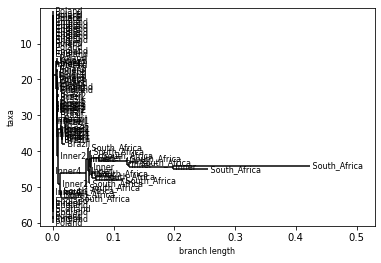

In [53]:
# Import matplotlib and create a basic tree 
import matplotlib
import matplotlib.pyplot as plt
fig = Phylo.draw(cov_tree,label_func=just_countries)

In [46]:
x[:x.find("/")]

'polska'

In [44]:
x="polska/xdd"

In [48]:
def just_countries(x):
    x=str(x)
    return x[:x.find("/")]

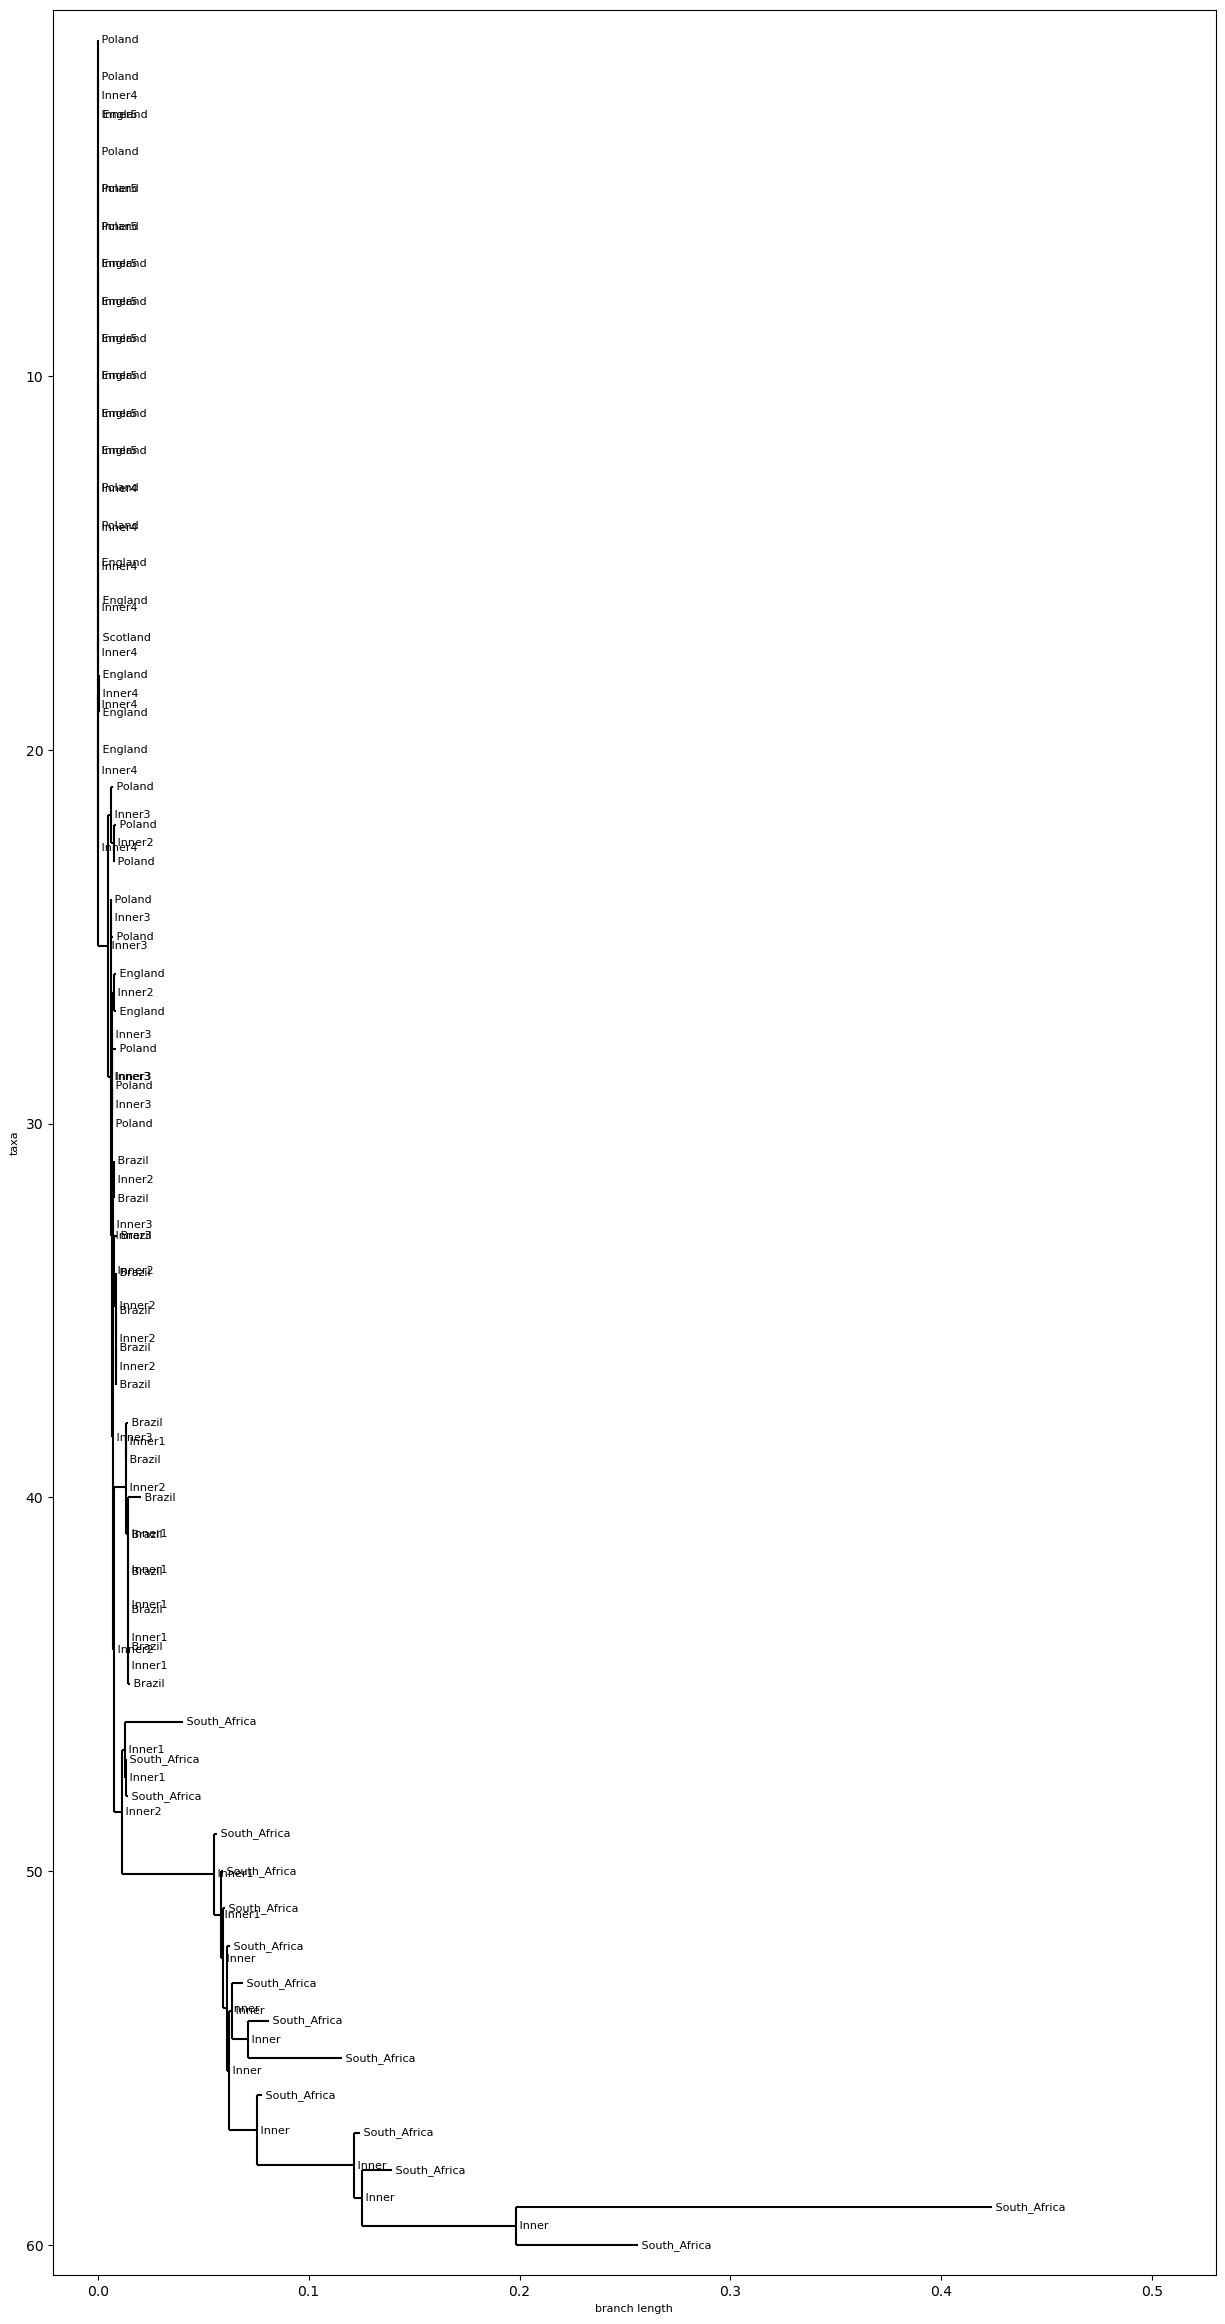

In [55]:


# Make a better looking tree using the features of matplotlib 

fig = plt.figure(figsize=(15, 30), dpi=100) # create figure & set the size 
matplotlib.rc('font', size=8)              # fontsize of the leaf and node labels 
matplotlib.rc('xtick', labelsize=10)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=10)       # fontsize of the tick labels
cov_tree.rooted = True
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(cov_tree, axes=axes,label_func=just_countries)
fig.savefig("cov_cladogram")

